In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [ ]:
drug_data = pd.read_csv('/content/drug200.csv')
drug_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
drug_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
print(drug_data['Sex'].unique())
print(drug_data['BP'].unique())
print(drug_data['Cholesterol'].unique())

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']


In [ ]:
print(drug_data['Sex'].value_counts())
print()
print(drug_data['BP'].value_counts())
print()
print(drug_data['Cholesterol'].value_counts())
print()
print(drug_data['Drug'].value_counts())

Sex
M    104
F     96
Name: count, dtype: int64

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


In [ ]:
ln = LabelEncoder()
ln

LabelEncoder()

In [ ]:
drug_data['Sex'] = ln.fit_transform(drug_data['Sex'])
drug_data['BP'] = ln.fit_transform(drug_data['BP'])
drug_data['Cholesterol'] = ln.fit_transform(drug_data['Cholesterol'])
drug_data['Drug'] = ln.fit_transform(drug_data['Drug'])

In [ ]:
drug_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


Sex
M    104
F     96
Name: count, dtype: int64

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [ ]:
print(drug_data['Sex'].value_counts())
print()
print(drug_data['BP'].value_counts())
print()
print(drug_data['Cholesterol'].value_counts())
print()
print(drug_data['Drug'].value_counts())

Sex
1    104
0     96
Name: count, dtype: int64

BP
0    77
1    64
2    59
Name: count, dtype: int64

Cholesterol
0    103
1     97
Name: count, dtype: int64

Drug
4    91
3    54
0    23
2    16
1    16
Name: count, dtype: int64


In [ ]:
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [ ]:
drug_data['Age'].describe().to_frame()

,Age
count,200.000000
mean,44.315000
std,16.544315
min,15.000000
25%,31.000000
50%,45.000000
75%,58.000000
max,74.000000


In [ ]:
x = drug_data.drop(['BP'], axis=True)
y = drug_data['BP']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=20, test_size=0.75)

In [ ]:
x_train

,Age,Sex,Cholesterol,Na_to_K,Drug
70,70,1,0,13.967,1
161,57,0,1,9.945,1
169,20,0,0,11.262,0
94,56,1,0,15.015,4
42,50,1,1,15.790,4
33,65,0,1,31.876,4
93,42,0,1,29.271,4
146,37,0,1,12.006,3
24,33,0,0,33.486,4
78,19,0,0,13.313,0


In [ ]:
print(drug_data.shape)
print(x_train.shape)
print(x_test.shape)

(200, 6)
(50, 5)
(150, 5)


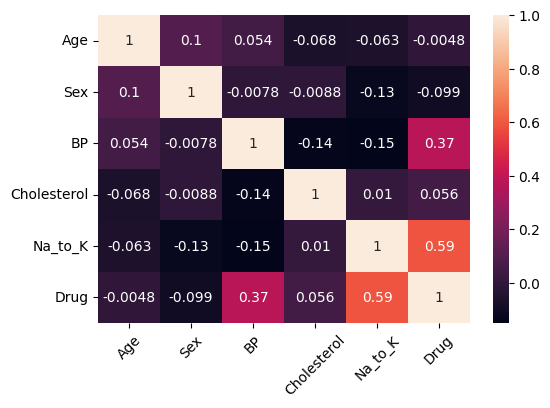

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(drug_data.corr(), annot=True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
model = DecisionTreeClassifier(criterion= 'gini', max_depth= 3, max_leaf_nodes= 4)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
x_train.describe()

,Age,Sex,Cholesterol,Na_to_K,Drug
count,50.000000,50.000000,50.000000,50.00000,50.000000
mean,42.200000,0.480000,0.520000,16.26504,2.640000
std,15.891212,0.504672,0.504672,8.13940,1.561789
min,15.000000,0.000000,0.000000,7.29800,0.000000
25%,28.750000,0.000000,0.000000,10.88350,1.250000
50%,41.500000,0.000000,1.000000,12.86900,3.000000
75%,52.750000,1.000000,1.000000,19.16350,4.000000
max,73.000000,1.000000,1.000000,34.99700,4.000000


In [ ]:
model.predict([[40, 1, 0, 16, 1]])

array([0])

In [ ]:
print(classification_report(y_pred, y_test))


              precision    recall  f1-score   support

           0       0.46      1.00      0.63        26
           1       0.53      0.32      0.40        74
           2       0.31      0.30      0.30        50

    accuracy                           0.43       150
   macro avg       0.43      0.54      0.45       150
weighted avg       0.45      0.43      0.41       150



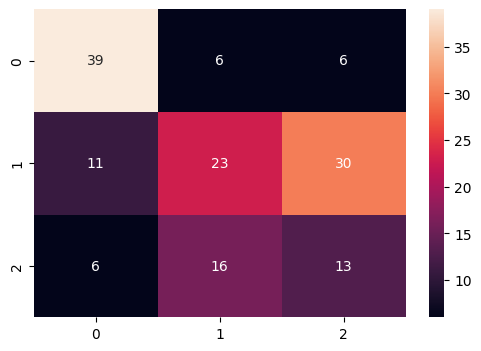

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, )
plt.show()

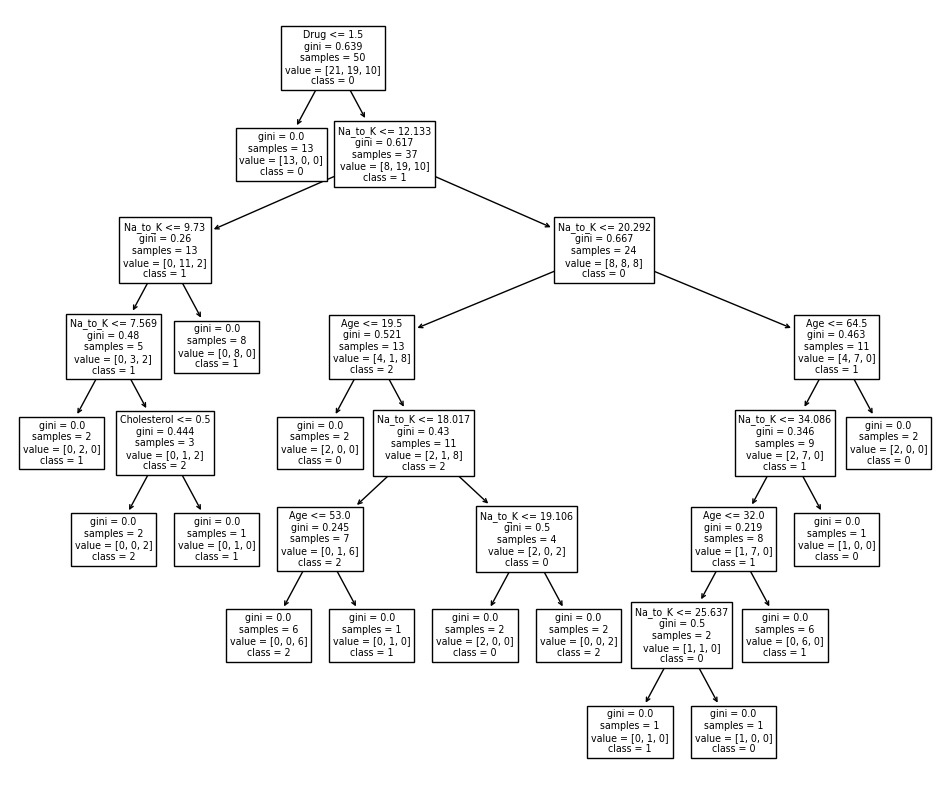

In [ ]:
plt.figure(figsize=(12, 10))
tree.plot_tree(model, class_names=['0', '1', '2'],
               feature_names=['Age', 'Sex', 'Cholesterol', 'Na_to_K', 'Drug'])
plt.show()

In [ ]:
x_train.columns

Index(['Age', 'Sex', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
tree_params = {'criterion':['gini', 'entropy'],
               'max_depth': list(range(1, 7)),
               'max_leaf_nodes': list(range(1, 7))}
search = GridSearchCV(model, tree_params, cv=5)
search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6]})

In [ ]:
print(search.best_estimator_)
search.best_params_

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4)


{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 4}

In [ ]:
search.best_score_

0.6799999999999999